In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# import the datasets as data frame

In [3]:
cb1=pd.DataFrame(pd.read_csv("E:/DataArtist/201707-citibike-tripdata.csv/201707-citibike-tripdata.csv"))

In [31]:
# calculate the size of the dataframe

In [4]:
cb1.shape

(1048575, 15)

In [5]:
# the location of the rent 
len(cb1['start station name'].unique())

619

In [35]:
# the average time of per rent

In [6]:
cb1['tripduration'].sum()/cb1['bikeid'].count()/60
# 18 minutes per rent

18.652502110006438

In [7]:
# the number of unique id
len(cb1['bikeid'].unique())

9922

In [38]:
# the number riding times

In [8]:
cb1['starttime'].count()

1048575

In [40]:
# the time of bike being rented 

In [9]:
cb1['bikeid'].count()/len(cb1['bikeid'].unique())

105.68181818181819

In [10]:
# the number of frequency everyday and everytime

In [43]:
cb1['bikeid'].count()/len(cb1['bikeid'].unique())/365

0.28953922789539227

What's the demographic information of the users in bike datasets?

In [12]:
user_gender=cb1.groupby('gender')['bikeid'].agg(len)/cb1['bikeid'].count()*100
user_gender

gender
0    13.957800
1    62.898314
2    23.143886
Name: bikeid, dtype: float64

In [13]:
colors=['green','orange','blue']

In [14]:
name=['unknow','male','female']

Barplot of gender distribution

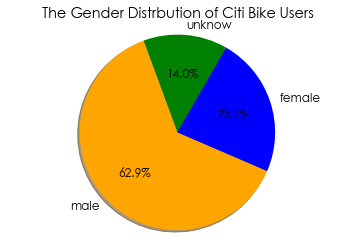

In [15]:
plt.rc('font', family='STXihei', size=12)
plt.pie(user_gender,labels=name,colors=colors,explode=(0,0,0),shadow=True,startangle=60,autopct='%1.1f%%')
plt.axis('equal')
# pie is drawn as a circle 
plt.title("The Gender Distrbution of Citi Bike Users")
# The conclusion: distribution is 3 to 1 

Age distribution of users

In [17]:
cb1['birth year'].describe()

count    906055.000000
mean       1979.564352
std          11.582321
min        1885.000000
25%        1972.000000
50%        1983.000000
75%        1989.000000
max        2001.000000
Name: birth year, dtype: float64

In [18]:
cb1['age']=2017-cb1['birth year']

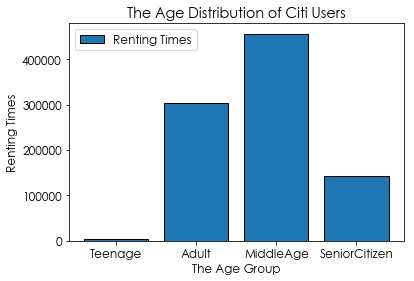

In [19]:
bins=[0,18,30,50,100]
group_age=["Teenage","Adult","MiddleAge","SeniorCitizen"]
cb1['group_age']=pd.cut(cb1['age'],bins,labels=group_age)
# user groupby
user_age=cb1.groupby('group_age')['group_age'].agg(len)
# make a barplots
a=np.array([1,2,3,4])
plt.bar([1,2,3,4],user_age,alpha=1,align='center',edgecolor='black')
# make titles 
plt.title("The Age Distribution of Citi Users")
plt.ylabel("Renting Times")
plt.xlabel("The Age Group")
plt.xticks(a,group_age)
plt.legend(['Renting Times'],loc="upper left")

Customer percentage of all users

In [22]:
customerpercent=cb1.groupby('usertype')['usertype'].agg(len)/cb1['usertype'].count()*100
customerpercent

usertype
Customer      15.611091
Subscriber    84.388909
Name: usertype, dtype: float64

(-1.1065956152449732,
 1.1049884330985527,
 -1.1035220413781492,
 1.1052984150049625)

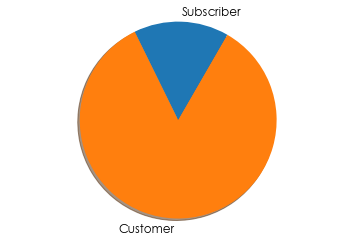

In [21]:
customer_names=["Subscriber","Customer"]
plt.pie(customerpercent,labels=customer_names,explode=(0,0),shadow=True,startangle=60)
plt.axis('equal')
# what's the anual fee customer

What's the hottest location?

In [25]:
toptenloc=pd.pivot_table(cb1,index=["start station name","start station latitude","start station longitude",
                                        "end station name","end station latitude","end station longitude"],
                                         values=['bikeid'],aggfunc=[len],fill_value=0,margins=True).head(10)

In [26]:
toptendstart=pd.pivot_table(cb1,index=["start station name","start station latitude","start station longitude"],
                           values=["bikeid"],aggfunc=[len]).head(20)

In [27]:
toptendstart

,,,len
,,,bikeid
start station name,start station latitude,start station longitude,
1 Ave & E 16 St,40.732219,-73.981656,4150
1 Ave & E 18 St,40.733812,-73.980544,3017
1 Ave & E 30 St,40.741444,-73.975361,2712
1 Ave & E 44 St,40.750020,-73.969053,1841
1 Ave & E 62 St,40.761227,-73.960940,2619
1 Ave & E 68 St,40.765005,-73.958185,3257
1 Ave & E 78 St,40.771404,-73.953517,2430
1 Ave & E 94 St,40.781721,-73.945940,841


 What's the average riding speed of the customer in NYC?

In [63]:
cb1.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,group_age
0,364,2017/7/1 0:00,2017/7/1 0:06,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1,31.0,MiddleAge
1,2142,2017/7/1 0:00,2017/7/1 0:35,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1,36.0,MiddleAge
2,328,2017/7/1 0:00,2017/7/1 0:05,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2,33.0,MiddleAge
3,2530,2017/7/1 0:00,2017/7/1 0:42,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1,32.0,MiddleAge
4,2534,2017/7/1 0:00,2017/7/1 0:42,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2,35.0,MiddleAge


In [67]:
from math import radians, cos, sin, asin, sqrt
# step: you need to calculate the distance
def haversine(lon1,lat1,lon2,lat2):
    lon1=map(radians,np.array(lon1))
    lat1=map(radians,np.array(lat1))
    lon2=map(radians,np.array(lon2))
    lat2=map(radians,np.array(lat2))
    lon1=np.array(list(lon1)).reshape(-1,1)
    lon2=np.array(list(lon2)).reshape(-1,1)
    lat1=np.array(list(lat1)).reshape(-1,1)
    lat2=np.array(list(lat2)).reshape(-1,1)
    dlon=lon2-lon1
    dlat=lat2-lat1
    # haversine formula
    a=np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c=2*np.arcsin(np.sqrt(a))
    r=6371
    return c*r*1000

cb1["meter"]=haversine(cb1["start station longitude"],cb1["start station latitude"],cb1["end station longitude"],
                      cb1["end station latitude"])

In [68]:
cb1["duration_hour"]=cb1["tripduration"]/3600
cb1["speed"]=cb1["meter"]/1000/cb1["duration_hour"]
km=cb1["meter"].sum()/1000
hour=cb1["duration_hour"].sum()
speed=km/hour
speed

6.0443613522352235

 The change of bike use in a day

In [70]:
time_split = pd.DataFrame((x.split(' ') for x in cb1.starttime),
                          index=cb1.index,columns=['start_date','start_time'])

In [71]:
cb1=pd.merge(cb1,time_split,right_index=True, left_index=True)

In [72]:
cb1['start_time']=pd.to_datetime(cb1['start_time'])

In [73]:
cb1 = cb1.set_index('start_time')

In [74]:
start_hour=cb1.resample('H',how=len)

c:\users\thinkpad\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


In [83]:
x=[datetime.datetime(2017,10,13,0,0,0)+datetime.timedelta(hours=i) for i in range(12)]

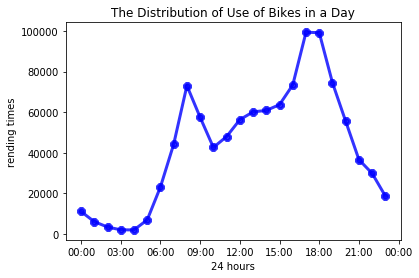

In [90]:
import datetime
import matplotlib.dates as mdates
fig,ax=plt.subplots(1)
ride_hour=start_hour["bikeid"]
x=[datetime.datetime(2017,10,13,0,0,0)+datetime.timedelta(hours=i) for i in range(12)]
plt.plot(ride_hour,'8',ride_hour,'g-',color='blue',linewidth=3,
        markeredgewidth=3,markeredgecolor='blue',alpha=0.8)
plt.xlabel("24 hours")
plt.ylabel("rending times")
plt.title("The Distribution of Use of Bikes in a Day")
xmf=mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xmf)

The riding duration of users

([<matplotlib.axis.XTick at 0x2b638cf7240>,
 <a list of 6 Text xticklabel objects>)

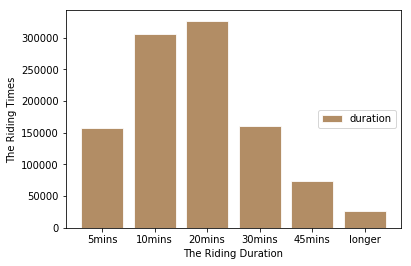

In [76]:
bins=[0, 300, 600, 1200, 1800, 2700, 2825827]
group_tripduration = ['5minutes', '10minutes', '20minutes', '30minutes', '45minutes'
, 'longer time']
cb1['group_tripduration'] = pd.cut(cb1['tripduration'], bins, labels=group_tripduration)
group_minute=cb1.groupby('group_tripduration')['group_tripduration'].agg(len)
b=np.array(range(6))
plt.bar(b,group_minute,color='#9F713F',alpha=0.8,align='center',edgecolor='white')
plt.xlabel("The Riding Duration")
plt.ylabel("The Riding Times")
plt.legend(["duration"],loc="right")
plt.xticks(b,('5mins','10mins','20mins','30mins', '45mins','longer')
)